In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Wine_clust.csv")
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


###Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Outliers

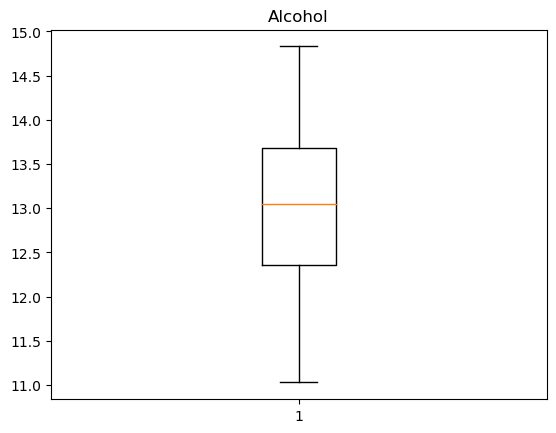

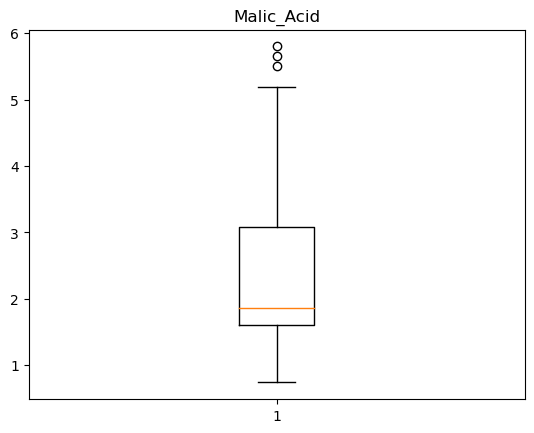

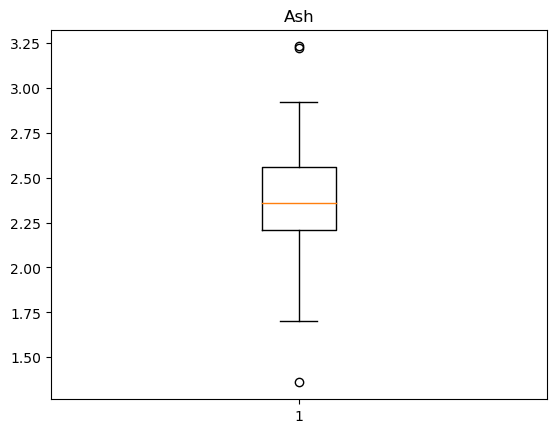

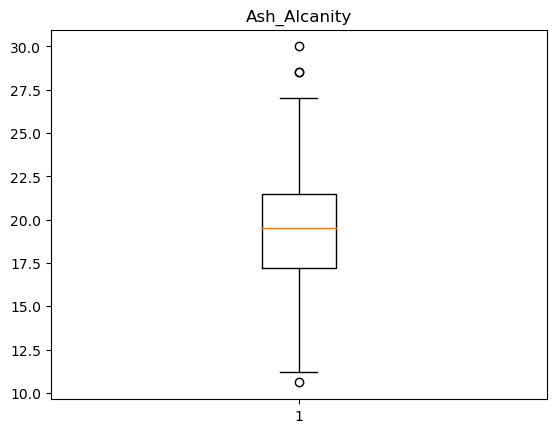

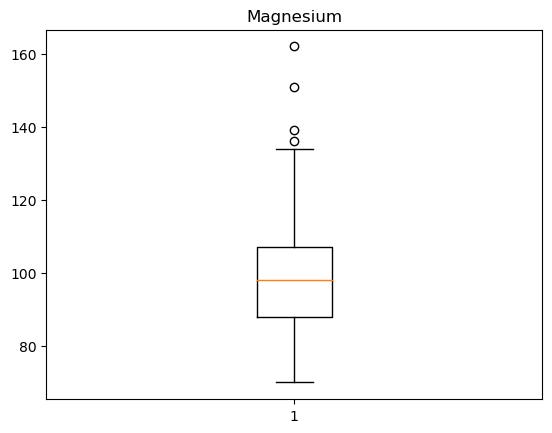

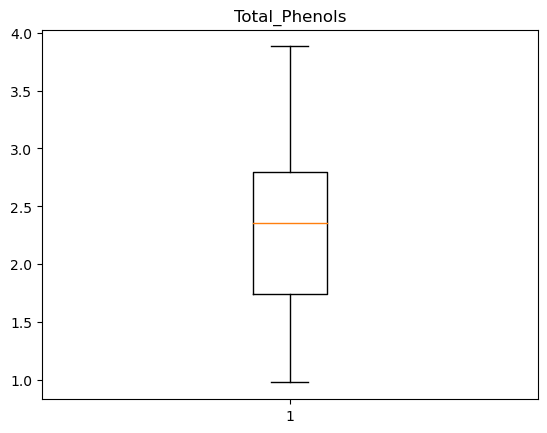

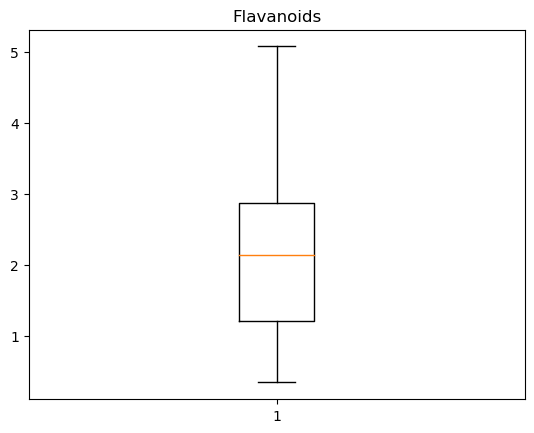

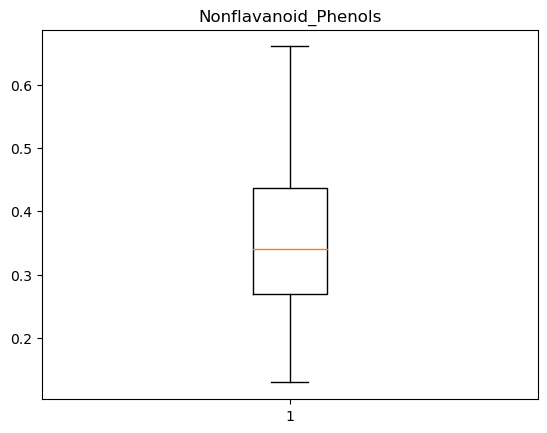

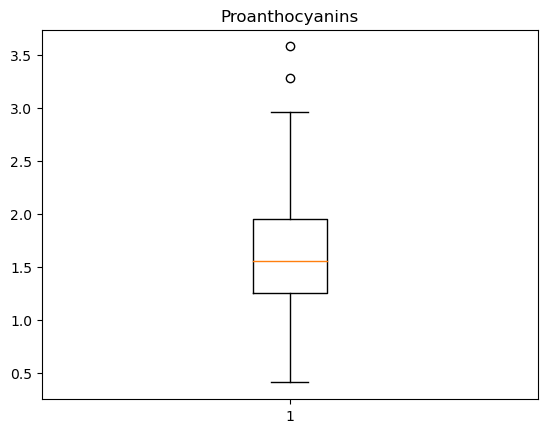

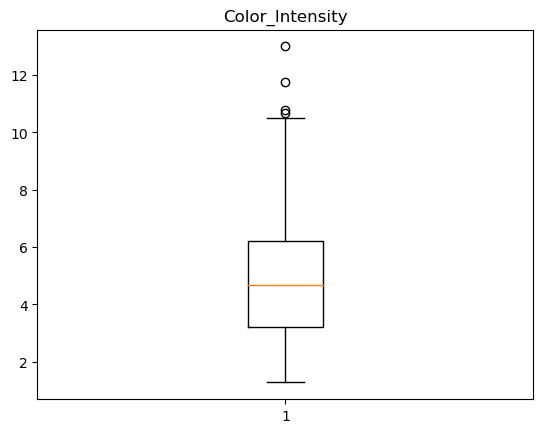

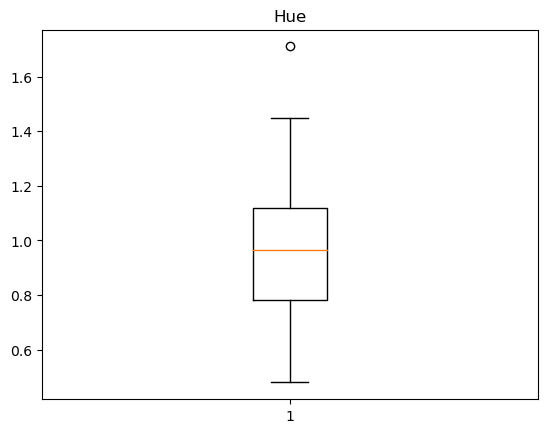

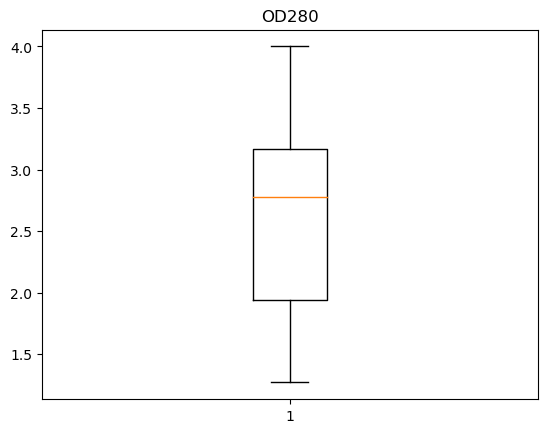

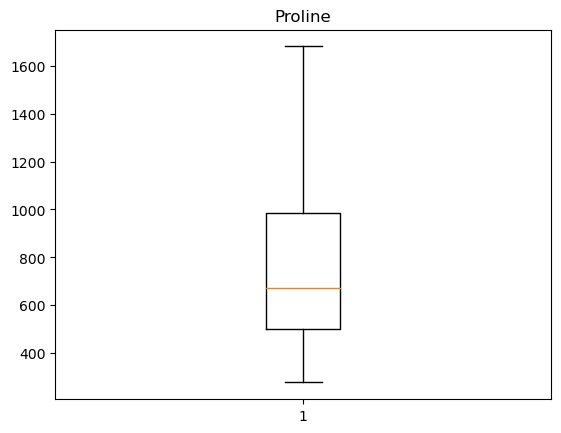

In [6]:
for features in data.columns:
    plt.boxplot(data[features])
    plt.title(features)
    plt.show()

The Features having outliers are Malic_Acid,Ash,Ash_Alcanity,Magnesium,Proanthocyanins,Color_Intensity,Hue

### Feature Engineering

Outliers Handling

In [7]:
feature_outliers=["Malic_Acid","Ash","Ash_Alcanity","Magnesium","Proanthocyanins","Color_Intensity","Hue"]scale=MinMaxScaler()
data1=scale.fit_transform(data)
data1=pd.DataFrame(data1,columns=data.columns)

In [8]:
for features in feature_outliers:
    q1=data[features].quantile(0.25)
    q3=data[features].quantile(0.75)
    iqr=q3-q1
    data.loc[data[features]<q1-1.5*iqr,features]=data[features].median()
    data.loc[data[features]>q3+1.5*iqr,features]=data[features].median()

Feature Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scale=MinMaxScaler()
data1=scale.fit_transform(data)
data1=pd.DataFrame(data1,columns=data.columns)

In [12]:
data1

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.217978,0.598361,0.278481,0.890625,0.627586,0.573840,0.283019,0.737255,0.471861,0.577320,0.970696,0.561341
1,0.571053,0.233708,0.360656,0.000000,0.468750,0.575862,0.510549,0.245283,0.341176,0.335498,0.587629,0.780220,0.550642
2,0.560526,0.364045,0.795082,0.468354,0.484375,0.627586,0.611814,0.320755,0.941176,0.476190,0.567010,0.695971,0.646933
3,0.878947,0.271910,0.655738,0.354430,0.671875,0.989655,0.664557,0.207547,0.694118,0.705628,0.391753,0.798535,0.857347
4,0.581579,0.415730,0.959016,0.620253,0.750000,0.627586,0.495781,0.490566,0.552941,0.329004,0.577320,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.252809,0.614754,0.588608,0.390625,0.241379,0.056962,0.735849,0.254902,0.694805,0.164948,0.172161,0.329529
174,0.623684,0.712360,0.639344,0.746835,0.500000,0.282759,0.086498,0.566038,0.392157,0.651515,0.226804,0.106227,0.336662
175,0.589474,0.795506,0.459016,0.556962,0.781250,0.210345,0.073840,0.566038,0.368627,0.965368,0.113402,0.106227,0.397290
176,0.563158,0.415730,0.549180,0.556962,0.781250,0.231034,0.071730,0.754717,0.411765,0.867965,0.123711,0.128205,0.400856


In [13]:
data1.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.344382,0.542964,0.518027,0.447507,0.453487,0.356386,0.437460,0.454836,0.392182,0.487901,0.491460,0.334446
std,0.213639,0.231467,0.202771,0.191488,0.191341,0.215811,0.210730,0.234818,0.210706,0.226482,0.228271,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.193820,0.420082,0.379747,0.281250,0.262931,0.182489,0.264151,0.329412,0.209957,0.311856,0.244505,0.158702
50%,0.531579,0.252247,0.540984,0.525316,0.437500,0.474138,0.378692,0.396226,0.448039,0.368506,0.497423,0.553114,0.282097
75%,0.696711,0.503933,0.688525,0.651899,0.562500,0.627586,0.534810,0.580189,0.600980,0.510823,0.659794,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### K-Means Clustering

In [14]:
from sklearn.cluster import KMeans

In [15]:
wcss=[]
for i in range(2,20):
    kmean=KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmean.fit(data1)
    wcss.append(kmean.inertia_)
    
wcss
    

[76.817324521581,
 57.89012026632134,
 53.30385272748026,
 50.409154649279884,
 47.75238122870186,
 45.70601487145285,
 43.497945768937285,
 41.36202384600191,
 40.135125661519304,
 39.00294195400519,
 38.39808280496596,
 37.16918400152194,
 35.464443769599434,
 34.40276258689451,
 34.09553432798654,
 32.84266638472808,
 32.13467977964542,
 31.179668453695644]

Elbow Method to find the optimum number of clusters

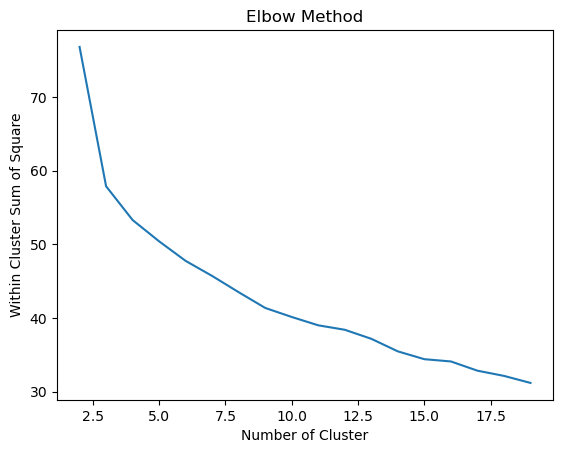

In [16]:
plt.plot(range(2,20),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("Within Cluster Sum of Square")
plt.show()

In [17]:
#We cant tell the optinum number of n from the above chart
#So,we opt Silhouette score
from sklearn.metrics import silhouette_score

In [18]:
sil=[]
for i in range(2,20):
    kmean1=KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmean_pred=kmean1.fit_predict(data1)
    nw_sil=silhouette_score(data1,kmean_pred)
    sil.append(nw_sil)
    
sil
    

[0.2838337306181337,
 0.29132149385323275,
 0.23605834284661997,
 0.23219700102905402,
 0.19645675489270534,
 0.1304123442508146,
 0.13267045312418327,
 0.1460737047565402,
 0.1378792879113254,
 0.13677730799954735,
 0.12897845735200092,
 0.12426596012585807,
 0.14013625634356983,
 0.141723423323431,
 0.12141005907127263,
 0.14263325136864552,
 0.12537966265849282,
 0.13579623838663113]

From the above dataset,Using K-Means clustering the silhouette Score is greater for the value of N=3.

### Agglomerative Hierarchical Clustering

In [20]:
#Draw Dendrogram to find the optimum value of n
import scipy.cluster.hierarchy as sch

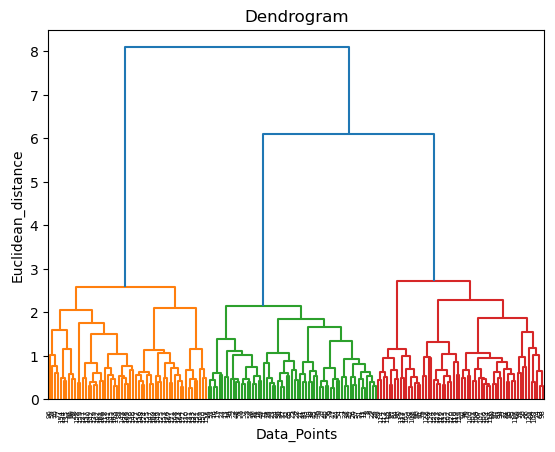

In [21]:
dendrogrem=sch.dendrogram(sch.linkage(data1,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Data_Points")
plt.ylabel("Euclidean_distance")
plt.show()

In [22]:
#From the above Dendrogram,the third blue line is the largest
#And it intersect 3 points so 3 clusters

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
ahc=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
y_ahc=ahc.fit_predict(data1)
y_ahc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2,
       0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [25]:
#To confirm the value of n ,we can use Silhouette score
sil=[]
for i in range(2,20):
    ahc1=AgglomerativeClustering(n_clusters=i,affinity="euclidean",linkage="ward")
    y_ahc1=ahc1.fit_predict(data1)
    nw_sil=silhouette_score(data1,y_ahc1)
    sil.append(nw_sil)
    
sil

[0.28512126595789,
 0.27951429649021536,
 0.22075846508425226,
 0.1836215207021437,
 0.18137998972648828,
 0.11830241452224284,
 0.12071495167328,
 0.12811759358105118,
 0.12721559508889768,
 0.12802665900762605,
 0.1370631771203581,
 0.14126117303638216,
 0.14626720290642445,
 0.14970114309916768,
 0.14808625255448388,
 0.14718797750903906,
 0.14420040818039645,
 0.14227460064241618]

For the above dataset,By using Agglomerative clustering the value of n=2 gives the maximum value of silhouette score.

### DB Scan Clustering

In [26]:
from sklearn.cluster import DBSCAN 

In [27]:
dbs=DBSCAN(eps=3,min_samples=4)
#eps - Epsilon (radius of cluster)
dbs_model=dbs.fit(data1)

In [28]:
labels=dbs_model.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [29]:
#To identify the core points
#creating an array having the same length of labels with value false
sample_cores=np.zeros_like(labels,dtype=bool)
sample_cores

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [30]:
# Getting the indices of core samples
dbs.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177], dtype=int64

In [31]:
#makes the core sample indices as True
sample_cores[dbs.core_sample_indices_]=True
sample_cores

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [32]:
#To find the number of clusters
#set - helps to select distinct value from the array
n_clusters=len(set(labels))-(1 if -1 in labels else 0)
n_clusters

1

In [33]:
#silhouette_score(data1,labels)
#we cant execute the above metrics because as per the DBScan clustering we have only one cluster
#for the above metrics, the number of cluster should be greater one 

The above dataset having data points with similar densities.So it is better to skip DBScan Clustering.

 Conclusion
 
The given dataset perform well in K-Means clustering with value of N=3,with 0.2913 as Silhouette Score.

So,the optimum number of cluster for the above dataset is 3.